In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df['Geography'].value_counts()/len(df)*100

France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64

In [8]:
df['Gender'].value_counts()/len(df)*100

Male      54.57
Female    45.43
Name: Gender, dtype: float64

In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df= df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df['Geography']= df['Geography'].astype('category')
df['Geography']= df['Geography'].cat.codes

df['Gender']= df['Gender'].astype('category')
df['Gender']= df['Gender'].cat.codes

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df= pd.get_dummies(df, columns=['Geography', 'Gender'])
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_1,Geography_2,Gender_0,Gender_1
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [14]:
df= df.drop(['Geography_2', 'Gender_1'], axis=1)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_1,Gender_0
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
 9   Geography_0      10000 non-null  uint8  
 10  Geography_1      10000 non-null  uint8  
 11  Gender_0         10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [16]:
# Split the data into x and y
x= df.drop(['Exited'], axis=1)
y= df['Exited']

In [17]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_scaler= scaler.fit_transform(x)
x_scaler

array([[-0.32622142,  0.29351742, -1.04175968, ...,  0.99720391,
        -0.57873591,  1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.00280393,
        -0.57873591,  1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ...,  0.99720391,
        -0.57873591,  1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ...,  0.99720391,
        -0.57873591,  1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ..., -1.00280393,
         1.72790383, -0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ...,  0.99720391,
        -0.57873591,  1.09598752]])

In [18]:
pd.DataFrame(x_scaler)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,0.997204,-0.578736,1.095988
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-1.002804,-0.578736,1.095988
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,0.997204,-0.578736,1.095988
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0.997204,-0.578736,1.095988
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-1.002804,-0.578736,1.095988
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,0.997204,-0.578736,-0.912419
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,0.997204,-0.578736,-0.912419
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,0.997204,-0.578736,1.095988
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,-1.002804,1.727904,-0.912419


In [21]:
# Check imbalance dataset
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Imbalanced data found. We have to use oversampling.

In [ ]:
#0 7963 7963
#1 2037 7963
#Total   15926

In [23]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros= RandomOverSampler()
x_ros, y_ros= ros.fit_resample(x_scaler, y)
print(x_ros.shape)
print(y_ros.shape)

(15926, 11)
(15926,)


Pre processing part completed.

<AxesSubplot:>

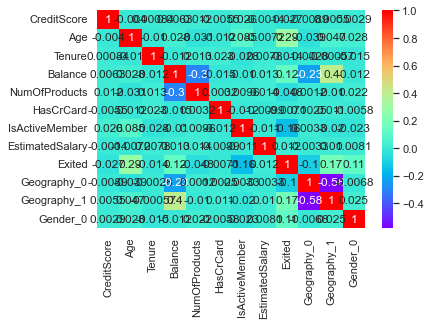

In [25]:
sns.heatmap(df.corr(), annot=True, cmap='rainbow')

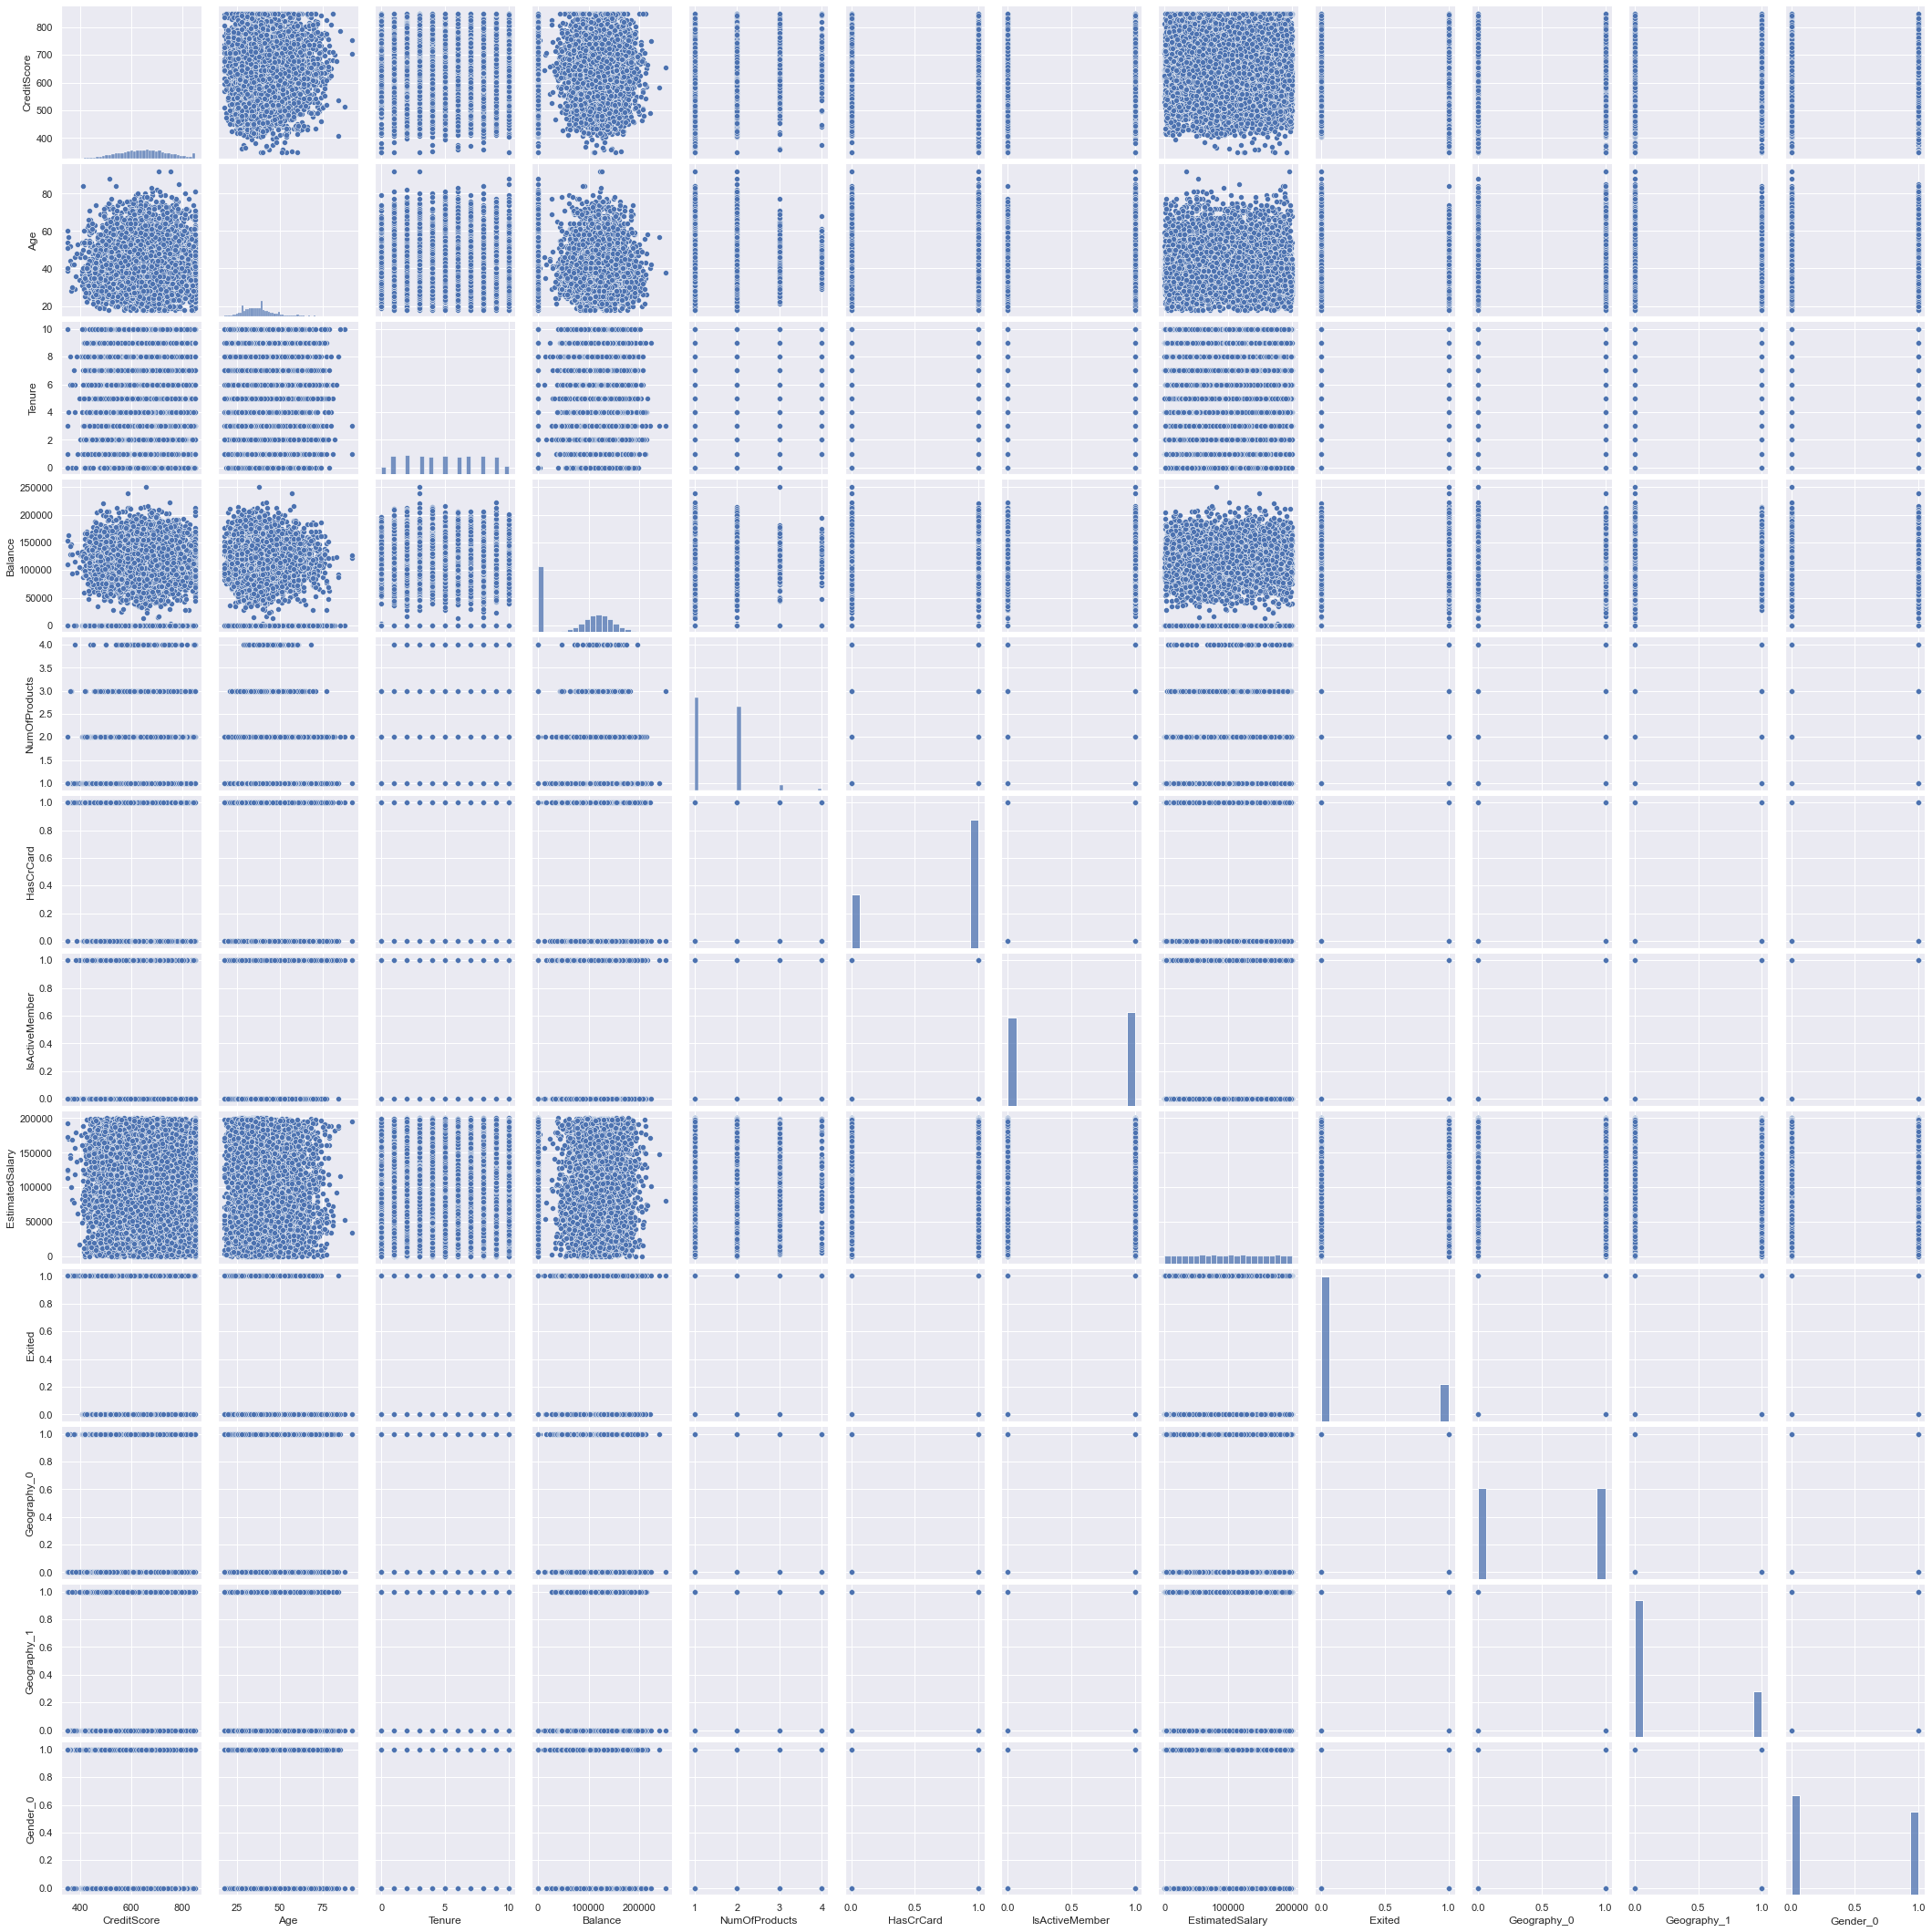

In [26]:
sns.pairplot(df)

In [27]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_ros, y_ros, test_size=0.3, random_state=1)

## XGBoost

Very good for high bias problem.

In [29]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [30]:
from xgboost import XGBClassifier
xgb= XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [31]:
y_pred_train= xgb.predict(x_train)
y_pred_test= xgb.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [33]:
print(confusion_matrix(y_train, y_pred_train))
print('....................................')
print(confusion_matrix(y_test, y_pred_test))

[[5403  238]
 [ 214 5293]]
....................................
[[2012  310]
 [ 207 2249]]


In [34]:
print(classification_report(y_train, y_pred_train))
print('....................................')
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5641
           1       0.96      0.96      0.96      5507

    accuracy                           0.96     11148
   macro avg       0.96      0.96      0.96     11148
weighted avg       0.96      0.96      0.96     11148

....................................
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      2322
           1       0.88      0.92      0.90      2456

    accuracy                           0.89      4778
   macro avg       0.89      0.89      0.89      4778
weighted avg       0.89      0.89      0.89      4778



In [35]:
print(accuracy_score(y_train, y_pred_train))
print('....................................')
print(accuracy_score(y_test, y_pred_test))

0.9594546106925009
....................................
0.8917957304311427


### Cross validation

In [45]:
from sklearn.model_selection import cross_val_score
accuract_test= cross_val_score(xgb, x_test, y_test, cv=10)
accuract_test

array([0.85146444, 0.85564854, 0.83263598, 0.83054393, 0.83263598,
       0.87447699, 0.84518828, 0.84937238, 0.83438155, 0.86582809])

In [46]:
accuract_test.mean()

0.8472176170802523

## Gradient Boosting DT

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [37]:
y_pred_train_gb= gb.predict(x_train)
y_pred_test_gb= gb.predict(x_test)

In [39]:
print(confusion_matrix(y_train, y_pred_train_gb))
print('....................................')
print(confusion_matrix(y_test, y_pred_test_gb))
print('....................................')
print(classification_report(y_train, y_pred_train_gb))
print('....................................')
print(classification_report(y_test, y_pred_test_gb))
print('....................................')
print(accuracy_score(y_train, y_pred_train_gb))
print('....................................')
print(accuracy_score(y_test, y_pred_test_gb))

[[4703  938]
 [1209 4298]]
....................................
[[1900  422]
 [ 594 1862]]
....................................
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      5641
           1       0.82      0.78      0.80      5507

    accuracy                           0.81     11148
   macro avg       0.81      0.81      0.81     11148
weighted avg       0.81      0.81      0.81     11148

....................................
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      2322
           1       0.82      0.76      0.79      2456

    accuracy                           0.79      4778
   macro avg       0.79      0.79      0.79      4778
weighted avg       0.79      0.79      0.79      4778

....................................
0.8074094007893793
....................................
0.7873587275010465


## Adaboost

In [42]:
from sklearn.ensemble import AdaBoostClassifier
ab= AdaBoostClassifier()
ab.fit(x_train, y_train)

AdaBoostClassifier()

In [43]:
y_pred_train_ab= ab.predict(x_train)
y_pred_test_ab= ab.predict(x_test)

In [44]:
print(confusion_matrix(y_train, y_pred_train_ab))
print('....................................')
print(confusion_matrix(y_test, y_pred_test_ab))
print('....................................')
print(classification_report(y_train, y_pred_train_ab))
print('....................................')
print(classification_report(y_test, y_pred_test_ab))
print('....................................')
print(accuracy_score(y_train, y_pred_train_ab))
print('....................................')
print(accuracy_score(y_test, y_pred_test_ab))

[[4568 1073]
 [1316 4191]]
....................................
[[1836  486]
 [ 631 1825]]
....................................
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      5641
           1       0.80      0.76      0.78      5507

    accuracy                           0.79     11148
   macro avg       0.79      0.79      0.79     11148
weighted avg       0.79      0.79      0.79     11148

....................................
              precision    recall  f1-score   support

           0       0.74      0.79      0.77      2322
           1       0.79      0.74      0.77      2456

    accuracy                           0.77      4778
   macro avg       0.77      0.77      0.77      4778
weighted avg       0.77      0.77      0.77      4778

....................................
0.7857014711158953
....................................
0.7662201758057765
